In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns     

In [2]:
df_days = pd.read_csv('uber-raw-data-14-days.csv')
df_minutes = pd.read_csv('uber-raw-data-14-minutes.csv')

In [3]:
day = df_days["Day"]
minutes = df_minutes["Minutes"]

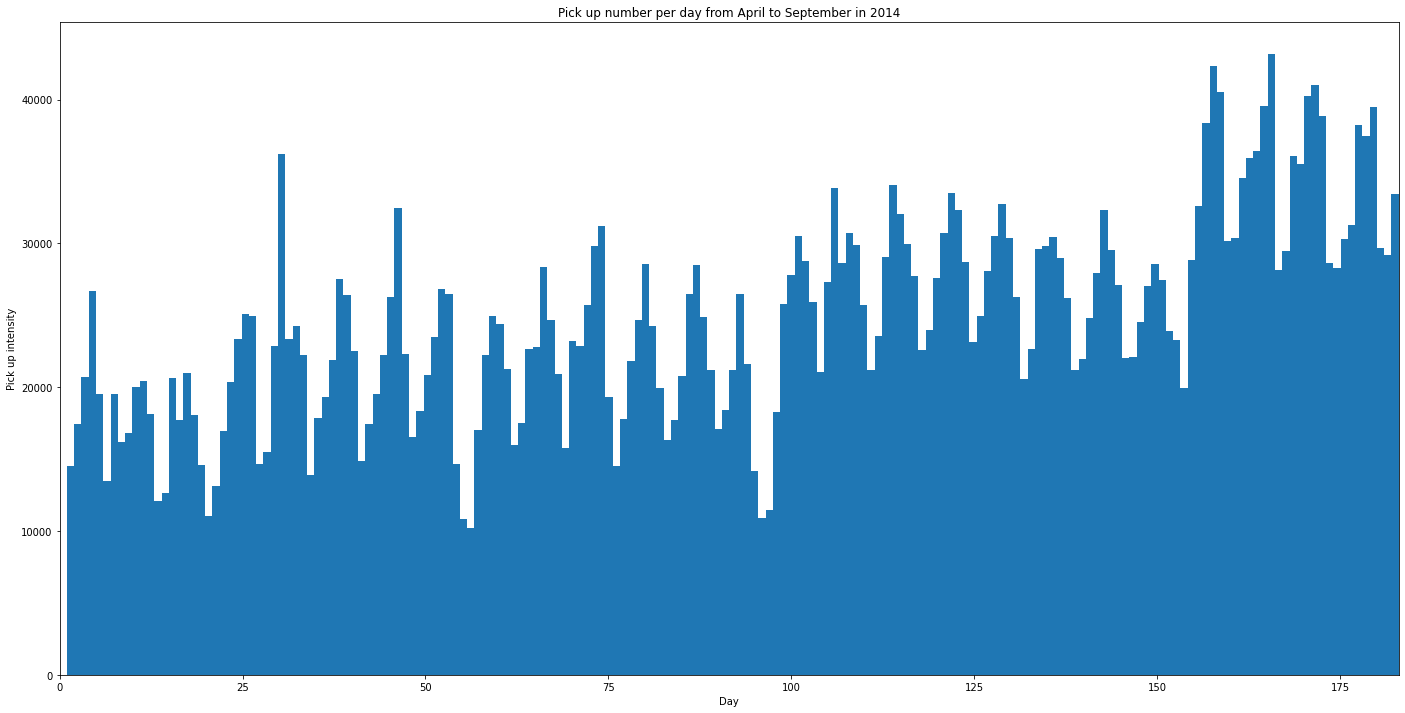

In [4]:
plt.figure(figsize=(24,12))
plt.hist(day, bins=183)
plt.title("Pick up number per day from April to September in 2014")
plt.xlim(0, 183)
plt.xlabel("Day")
plt.ylabel("Pick up intensity")
plt.show()

In [5]:
df_days['Day'] = pd.to_numeric(df_days['Day'], errors='coerce')
df_days

,Date/Time,Lat,Lon,Base,Year,Month,Day,Day_Name,Minutes
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,4,1,Tuesday,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,4,1,Tuesday,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,4,1,Tuesday,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,4,1,Tuesday,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,4,1,Tuesday,33
...,...,...,...,...,...,...,...,...,...
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,2014,9,183,Tuesday,1377
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,2014,9,183,Tuesday,1377
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,2014,9,183,Tuesday,1378
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,2014,9,183,Tuesday,1378


In [6]:
grouped_day = df_days.groupby('Day').size().reset_index(name='Pickups')
grouped_day

,Day,Pickups
0,1,14546
1,2,17474
2,3,20701
3,4,26714
4,5,19521
...,...,...
178,179,37504
179,180,39468
180,181,29656
181,182,29201


In [7]:
pickups_day = grouped_day['Pickups'].values
days = grouped_day['Day'].values

In [8]:
fft_result_day = np.fft.fft(pickups_day)
frequencies_day = np.fft.fftfreq(len(pickups_day), d=1)
positive_freqs_day = frequencies_day[:len(pickups_day)//2]
positive_fft_day = fft_result_day[:len(pickups_day)//2]

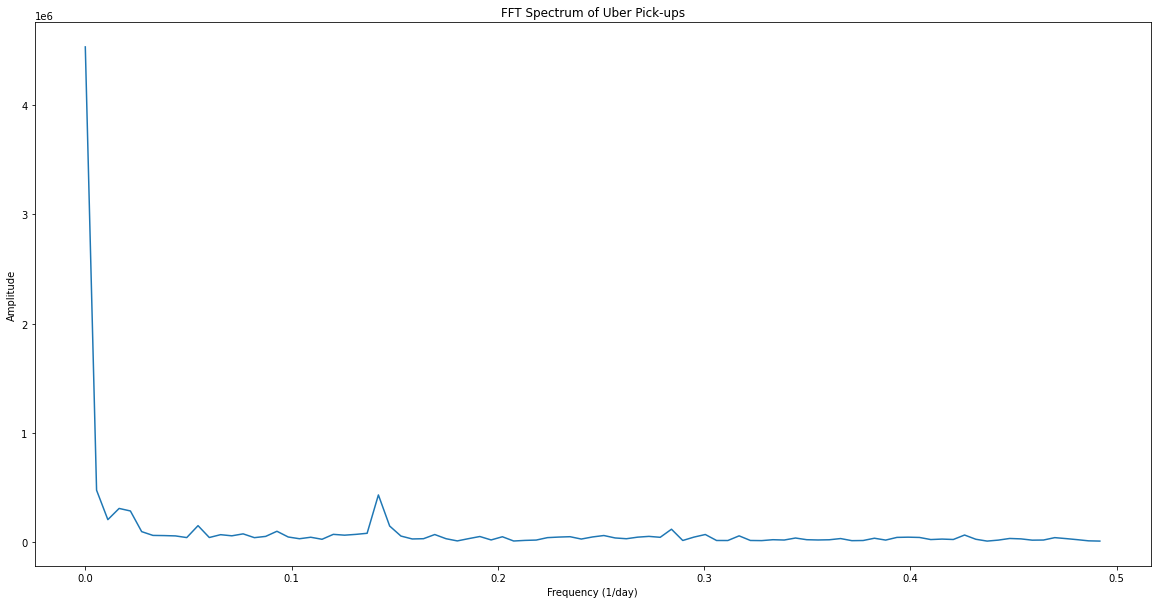

In [9]:
plt.figure(figsize=(20,10))
plt.plot(positive_freqs_day, np.abs(positive_fft_day))
plt.xlabel('Frequency (1/day)')
plt.ylabel('Amplitude')
plt.title('FFT Spectrum of Uber Pick-ups')
plt.show()

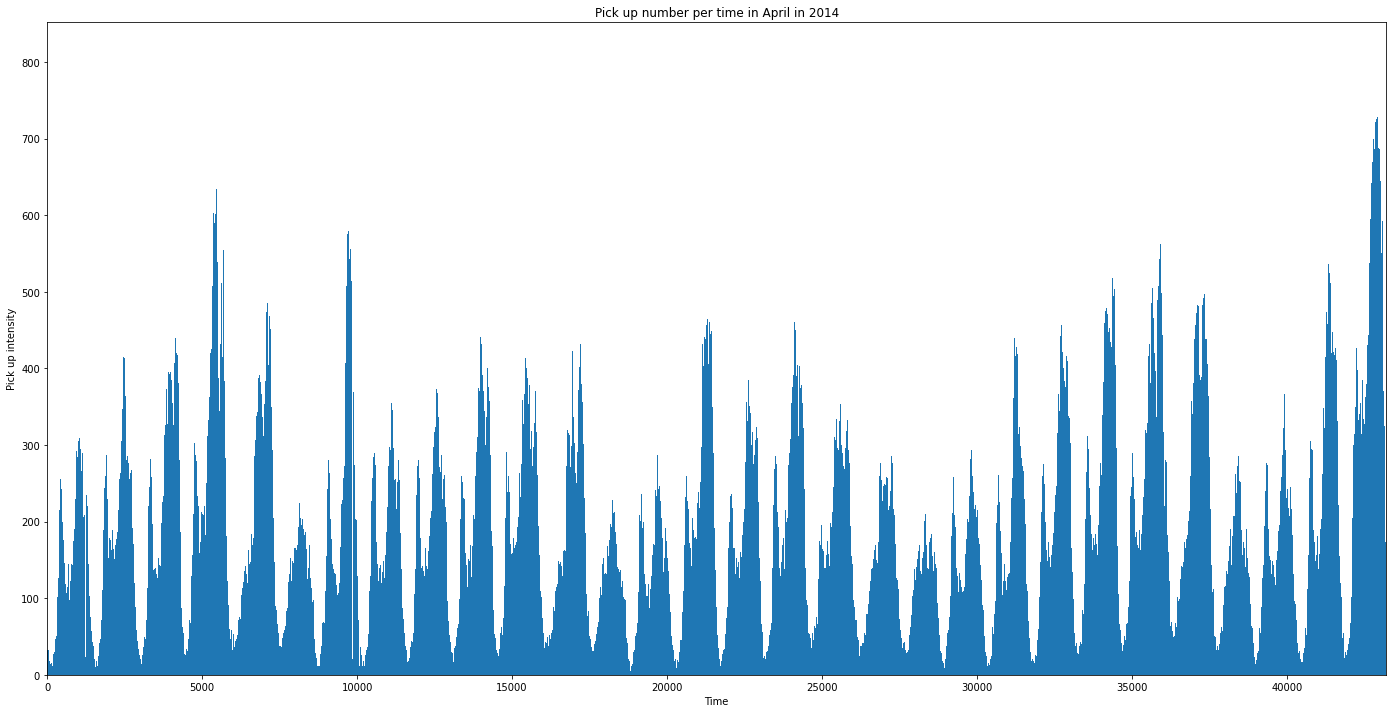

In [10]:
plt.figure(figsize=(24,12))
plt.hist(minutes, bins=2880)
plt.title("Pick up number per time in April in 2014")
plt.xlim((0, 43200))
plt.xlabel("Time")
plt.ylabel("Pick up intensity")
plt.show()

In [11]:
df_minutes['Minutes'] = pd.to_numeric(df_minutes['Minutes'], errors='coerce')
df_minutes

,Date/Time,Lat,Lon,Base,Year,Month,Day,Day_Name,Minutes
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,4,1,Tuesday,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,4,1,Tuesday,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,4,1,Tuesday,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,4,1,Tuesday,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,4,1,Tuesday,33
...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2014,4,30,Wednesday,43162
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2014,4,30,Wednesday,43166
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2014,4,30,Wednesday,43171
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2014,4,30,Wednesday,43172


In [12]:
df_minutes['Time Slot'] = pd.cut(df_minutes['Minutes'], bins=range(0, 43201, 15), right=False)

In [13]:
df_minutes['Period'] = df_minutes['Time Slot'].cat.codes + 1
df_minutes

,Date/Time,Lat,Lon,Base,Year,Month,Day,Day_Name,Minutes,Time Slot,Period
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,4,1,Tuesday,11,"[0, 15)",1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,4,1,Tuesday,17,"[15, 30)",2
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,4,1,Tuesday,21,"[15, 30)",2
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,4,1,Tuesday,28,"[15, 30)",2
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,4,1,Tuesday,33,"[30, 45)",3
...,...,...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2014,4,30,Wednesday,43162,"[43155, 43170)",2878
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2014,4,30,Wednesday,43166,"[43155, 43170)",2878
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2014,4,30,Wednesday,43171,"[43170, 43185)",2879
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2014,4,30,Wednesday,43172,"[43170, 43185)",2879


In [14]:
grouped_minutes = df_minutes.groupby('Period').size().reset_index(name='Pickups')
grouped_minutes

,Period,Pickups
0,1,32
1,2,38
2,3,36
3,4,32
4,5,21
...,...,...
2875,2876,368
2876,2877,325
2877,2878,241
2878,2879,174


In [15]:
pickups_minutes = grouped_minutes['Pickups'].values
minutes = grouped_minutes['Period'].values

In [16]:
fft_result_minutes = np.fft.fft(pickups_minutes)
frequencies_minutes = np.fft.fftfreq(len(pickups_minutes), d=1)
positive_freqs_minutes = frequencies_minutes[:len(pickups_minutes)//2]
positive_fft_minutes = fft_result_minutes[:len(pickups_minutes)//2]

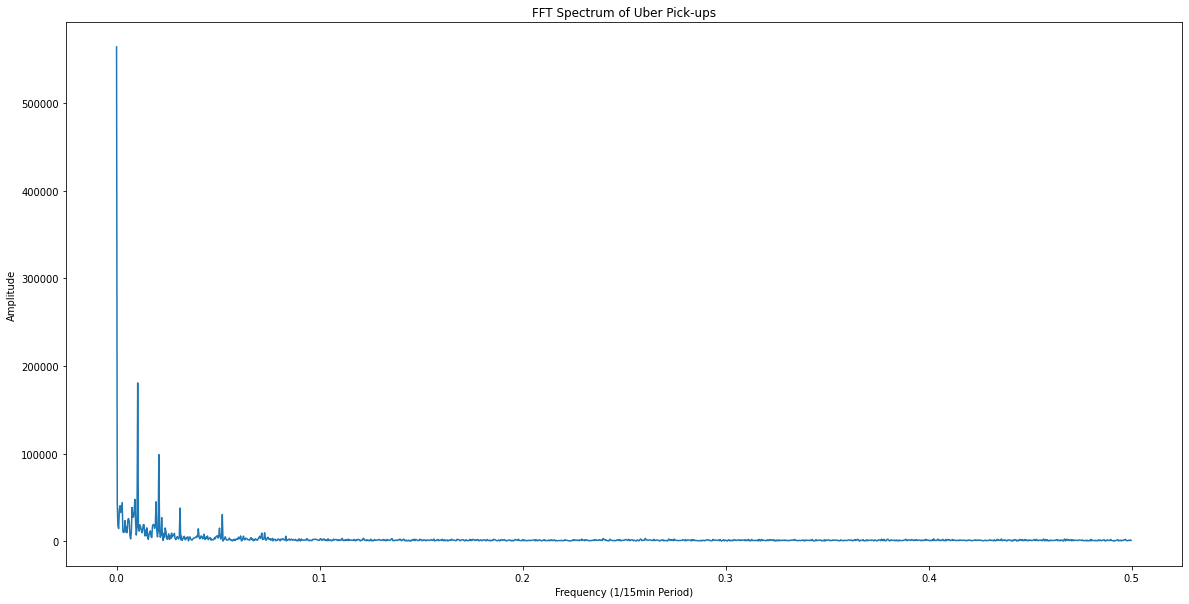

In [17]:
plt.figure(figsize=(20,10))
plt.plot(positive_freqs_minutes, np.abs(positive_fft_minutes))
plt.xlabel('Frequency (1/15min Period)')
plt.ylabel('Amplitude')
plt.title('FFT Spectrum of Uber Pick-ups')
plt.show()